# Competição DSA de Machine Learning - Edição Dezembro/2019

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
22
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Leitura dos dados

In [2]:
pd.options.display.float_format = '{:,.10f}'.format
path = '/kaggle/input/competicao-dsa-machine-learning-dec-2019/'


dftreino = pd.read_csv(path + 'dataset_treino.csv')
dftreino.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.3357394154,8.7274744355,C,3.9210257481,7.9152657142,2.5992778082,3.1768949736,0.0129414659,...,8.0000000901,1.9897802026,0.0357536853,AU,1.8041257011,3.1137190788,2.0242853775,0,0.6363645085,2.8571437364
1,4,1,nan,nan,C,nan,9.1912651806,nan,nan,2.3016304917,...,nan,nan,0.5988956460,AF,nan,nan,1.9578250111,0,nan,nan
2,5,1,0.9438769102,5.3100792009,C,4.4109686905,5.3261593823,3.9795918937,3.9285711092,0.0196451312,...,9.3333334404,2.4775957876,0.0134519141,AE,1.7737090162,3.9221932959,1.1204684183,2,0.8831175340,1.1764715031
3,6,1,0.7974145562,8.3047571359,C,4.2259298564,11.6274384197,2.0977004400,1.9875487515,0.1719467045,...,7.0182561556,1.8127949771,0.0022673841,CJ,1.4152303890,2.9543812664,1.9908467723,1,1.6771076007,1.0344828525
4,8,1,nan,nan,C,nan,nan,nan,nan,nan,...,nan,nan,nan,Z,nan,nan,nan,0,nan,nan


In [3]:
dfteste = pd.read_csv(path + 'dataset_teste.csv')
dfteste.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.3754654578,11.3611411955,C,4.2007783623,6.5769999270,2.0817840357,1.7843861206,0.0110939889,9.5238104280,...,7.6190483588,1.8152414938,0.0000001112,AF,1.2923681628,3.9033452074,1.4859250896,0,2.3333337747,1.4285720504
1,1,nan,nan,C,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,I,nan,nan,nan,0,nan,nan
2,2,-0.0000004903,8.2015293913,C,4.5443706322,6.5500998885,1.5584416825,2.4675319867,0.0071636687,7.1428576794,...,5.7142864943,1.9709275333,0.0141226486,AV,1.1287238348,5.8441562100,1.4758922500,0,1.2631571791,-0.0000006380
3,7,2.6618697078,3.0412412671,C,1.6572160563,9.7730802367,2.0783371399,1.4308547181,1.2521567573,7.9595955891,...,4.4040396081,8.1636139509,1.1003294510,B,1.9886880291,1.5587534915,2.4488138274,0,5.3854742264,1.4937765779
4,10,1.2528220673,11.2833515117,C,4.6383880267,8.5205102145,2.3024835470,3.5101588822,0.0742633436,7.6129039102,...,6.5806442164,1.3256543211,0.2584587565,A,1.8637961638,2.6664784875,2.3742747552,0,0.6816724072,2.2641508043


In [4]:
dfsubmission = pd.read_csv(path + 'sample_submission.csv')
dfsubmission.head()

,ID,PredictedProb
0,0,0.5000000000
1,1,0.5000000000
2,2,0.5000000000
3,7,0.5000000000
4,10,0.5000000000


In [5]:
len(dftreino), len(dfteste), len(dfsubmission), len(dftreino.columns)

(114321, 114393, 114393, 133)

In [6]:
dftreino.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.3357394154,8.7274744355,C,3.9210257481,7.9152657142,2.5992778082,3.1768949736,0.0129414659,...,8.0000000901,1.9897802026,0.0357536853,AU,1.8041257011,3.1137190788,2.0242853775,0,0.6363645085,2.8571437364
1,4,1,nan,nan,C,nan,9.1912651806,nan,nan,2.3016304917,...,nan,nan,0.5988956460,AF,nan,nan,1.9578250111,0,nan,nan
2,5,1,0.9438769102,5.3100792009,C,4.4109686905,5.3261593823,3.9795918937,3.9285711092,0.0196451312,...,9.3333334404,2.4775957876,0.0134519141,AE,1.7737090162,3.9221932959,1.1204684183,2,0.8831175340,1.1764715031
3,6,1,0.7974145562,8.3047571359,C,4.2259298564,11.6274384197,2.0977004400,1.9875487515,0.1719467045,...,7.0182561556,1.8127949771,0.0022673841,CJ,1.4152303890,2.9543812664,1.9908467723,1,1.6771076007,1.0344828525
4,8,1,nan,nan,C,nan,nan,nan,nan,nan,...,nan,nan,nan,Z,nan,nan,nan,0,nan,nan


# verifica o tipo de dados e converte para inteiro/real

In [7]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [8]:
dfteste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114393 entries, 0 to 114392
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 115.2+ MB


In [9]:
dfcategorias_treino = dftreino.select_dtypes(include='object')
print(dfcategorias_treino.columns)

categorias_treino = list(dfcategorias_treino)
print(categorias_treino)

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')
['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


In [10]:
dfcategorias_teste = dfteste.select_dtypes(include='object')
print(dfcategorias_teste.columns)

categorias_teste = list(dfcategorias_teste)
print(categorias_teste)

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')
['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


In [11]:
# Codificar os dados de treino
from sklearn import preprocessing

# varre o dataframe substituindo dados categóricos para inteiro 
for atributo in categorias_treino:
    print(atributo)
    le = preprocessing.LabelEncoder()
    dftreino[atributo] = le.fit_transform(dftreino[atributo].astype(str))
    
dftreino[categorias_treino].head()

v3
v22
v24
v30
v31
v47
v52
v56
v66
v71
v74
v75
v79
v91
v107
v110
v112
v113
v125


,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,16670,2,2,0,2,6,85,2,4,1,3,4,0,4,1,14,36,21
1,2,7733,2,2,0,4,6,101,0,4,1,3,3,1,1,0,20,17,6
2,2,7086,4,7,0,2,5,17,0,1,1,1,4,6,2,1,18,36,5
3,2,1510,3,2,1,2,7,47,0,4,1,3,1,1,1,1,9,36,64
4,2,8037,4,7,0,8,7,122,2,4,1,3,2,6,2,0,19,17,89


In [12]:
# Codificar os dados de teste
from sklearn import preprocessing

# varre o dataframe substituindo dados categóricos para inteiro 
for atributo in categorias_teste:
    print(atributo)
    le = preprocessing.LabelEncoder()
    dfteste[atributo] = le.fit_transform(dfteste[atributo].astype(str))
    
dfteste[categorias_teste].head()

v3
v22
v24
v30
v31
v47
v52
v56
v66
v71
v74
v75
v79
v91
v107
v110
v112
v113
v125


,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,3040,4,7,0,8,2,6,0,3,1,3,15,1,1,0,20,36,6
1,2,7094,3,0,0,2,0,80,2,3,1,3,4,2,3,1,4,36,72
2,2,8384,1,2,0,7,0,86,2,3,1,3,2,2,3,0,16,10,22
3,2,3540,4,4,0,7,0,61,1,3,1,3,2,1,1,0,5,16,27
4,2,4540,4,2,0,7,7,116,1,3,1,3,2,1,1,0,0,18,0


In [13]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(25)
memory usage: 116.0 MB


In [14]:
dfteste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114393 entries, 0 to 114392
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(24)
memory usage: 115.2 MB


# verifica e trata nulos

In [15]:
# dados de treino
nulos = dftreino.isna().sum().to_frame().reset_index()
nulos.columns = ['atributo', 'num_nulos']
nulos = nulos[ nulos.num_nulos > 0]
nulos = nulos.sort_values('num_nulos', ascending=False)
len(nulos), len(dftreino.columns)

(108, 133)

In [16]:
nulos = nulos.sort_values('num_nulos', ascending=False)
nulos[:20]

,atributo,num_nulos
103,v102,51316
86,v85,50682
120,v119,50680
124,v123,50678
52,v51,50678
24,v23,50675
70,v69,49895
79,v78,49895
17,v16,49895
132,v131,49895


In [17]:
# treino - Versão 1 - colocar a média do atributo no valor nulo
atributos = list(dftreino.columns)
for atributo in atributos:
    dftreino[atributo] = dftreino[atributo].fillna((dftreino[atributo].mean()))

nulos = dftreino.isna().sum()
nulos

ID        0
target    0
v1        0
v2        0
v3        0
         ..
v127      0
v128      0
v129      0
v130      0
v131      0
Length: 133, dtype: int64

In [18]:
# dados de teste
nulos = dfteste.isna().sum().to_frame().reset_index()
nulos.columns = ['atributo', 'num_nulos']
nulos = nulos[ nulos.num_nulos > 0]
nulos = nulos.sort_values('num_nulos', ascending=False)
len(nulos), len(dfteste.columns)

(108, 132)

In [19]:
# teste - Versão 1 - colocar a média do atributo no valor nulo
atributos = list(dfteste.columns)
for atributo in atributos:
    dfteste[atributo] = dfteste[atributo].fillna((dfteste[atributo].mean()))

nulos = dfteste.isna().sum()
nulos

ID      0
v1      0
v2      0
v3      0
v4      0
       ..
v127    0
v128    0
v129    0
v130    0
v131    0
Length: 132, dtype: int64

# X e y (treino e teste)

In [20]:
atributos_x = list(dftreino.columns) 
atributos_x.remove('target')
#atributos_x.remove('ID') # ALTERACAO
print(atributos_x)

['ID', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131']


In [21]:
X = dftreino[atributos_x]
y = dftreino['target']

In [22]:
X_treino = X
y_treino = y

In [23]:
X_treino.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1.3357394154,8.7274744355,2,3.9210257481,7.9152657142,2.5992778082,3.1768949736,0.0129414659,9.9999994710,...,8.0000000901,1.9897802026,0.0357536853,21,1.8041257011,3.1137190788,2.0242853775,0,0.6363645085,2.8571437364
1,4,1.6306856749,7.4644107808,2,4.1450975035,9.1912651806,2.4364015815,2.4839208102,2.3016304917,9.0318585931,...,6.8224391422,3.5499383273,0.5988956460,6,1.6726576869,3.2395418344,1.9578250111,0,1.9257634680,1.7393891286
2,5,0.9438769102,5.3100792009,2,4.4109686905,5.3261593823,3.9795918937,3.9285711092,0.0196451312,12.6666671203,...,9.3333334404,2.4775957876,0.0134519141,5,1.7737090162,3.9221932959,1.1204684183,2,0.8831175340,1.1764715031
3,6,0.7974145562,8.3047571359,2,4.2259298564,11.6274384197,2.0977004400,1.9875487515,0.1719467045,8.9655163211,...,7.0182561556,1.8127949771,0.0022673841,64,1.4152303890,2.9543812664,1.9908467723,1,1.6771076007,1.0344828525
4,8,1.6306856749,7.4644107808,2,4.1450975035,8.7423591810,2.4364015815,2.4839208102,1.4965685851,9.0318585931,...,6.8224391422,3.5499383273,0.9198119853,89,1.6726576869,3.2395418344,2.0303732349,0,1.9257634680,1.7393891286


In [24]:
y_treino.unique()

array([1, 0])

In [25]:
X_teste = dfteste[atributos_x]

In [26]:
X_teste.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.3754654578,11.3611411955,2,4.2007783623,6.5769999270,2.0817840357,1.7843861206,0.0110939889,9.5238104280,...,7.6190483588,1.8152414938,0.0000001112,6,1.2923681628,3.9033452074,1.4859250896,0,2.3333337747,1.4285720504
1,1,1.6286233896,7.4360879272,2,4.1412650292,8.7397965889,2.4358840821,2.4821342527,1.5122461857,9.0318397636,...,6.8232177662,3.5569398041,0.9388671737,72,1.6725035023,3.2378923355,2.0285947872,0,1.9324082931,1.7362559263
2,2,-0.0000004903,8.2015293913,2,4.5443706322,6.5500998885,1.5584416825,2.4675319867,0.0071636687,7.1428576794,...,5.7142864943,1.9709275333,0.0141226486,22,1.1287238348,5.8441562100,1.4758922500,0,1.2631571791,-0.0000006380
3,7,2.6618697078,3.0412412671,2,1.6572160563,9.7730802367,2.0783371399,1.4308547181,1.2521567573,7.9595955891,...,4.4040396081,8.1636139509,1.1003294510,27,1.9886880291,1.5587534915,2.4488138274,0,5.3854742264,1.4937765779
4,10,1.2528220673,11.2833515117,2,4.6383880267,8.5205102145,2.3024835470,3.5101588822,0.0742633436,7.6129039102,...,6.5806442164,1.3256543211,0.2584587565,0,1.8637961638,2.6664784875,2.3742747552,0,0.6816724072,2.2641508043


# Modelo

# GridSearch

In [27]:
#%%time


#best params
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 
 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}


parameters_for_testing = {
   'colsample_bytree': [0.6], 
    'gamma':[0], 
    'min_child_weight': [1], 
    'learning_rate': [0.01],
    'max_depth':[10], # [5,10],
    'n_estimators':[300],
    'subsample':[0.6]  
}

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier(nthread=-1, seed=7)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1, #6,
                       iid=False, verbose=10) 

gsearch1.fit(X_treino.values, y_treino.values) 
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.7min finished


best params
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
best score
0.7820960278514009


In [28]:
modelo = modelXGB = gsearch1

In [29]:
import gc
gc.collect()

89

# Gera arquivo de saída

In [30]:
# Gera arquivo para o Kaggle - PropertyId,Score
from IPython.display import FileLink
import numpy as np

nome_arquivo = 'Submissao-v02-XGBoost.csv'
df_saida = pd.DataFrame()  
df_saida['ID'] = dfteste.ID.values

yteste_previsto = modelo.predict_proba(X_teste.values)[:,1] 

df_saida['PredictedProb'] =   yteste_previsto
# Salvando o arquivo
df_saida.to_csv(nome_arquivo, index=False)
#!head Submissao-v02-XGBoost.csv
FileLink(nome_arquivo)
#FileLink(r'df_name.csv')

/kaggle/working/Submissao-v02-XGBoost.csv

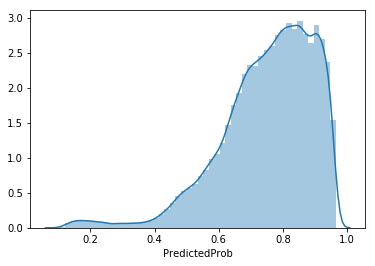

In [31]:
import matplotlib.pyplot as plt
#%matplotlib inline

import seaborn as sns
sns.distplot(df_saida.PredictedProb)